In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
np.set_printoptions(suppress=True) # to remove e from float, scientific notation

## 1. Data cleaning

### Loading the raw dataset
- We got the data for the hall of fame players from here: https://www.basketball-reference.com/awards/hof.html
- There are some ***non ascii character*** in the raw dataset, so we should use **unicode_escape** to load the data

In [2]:
data_candidates = pd.read_csv("data/nba-hall-of-fame-candidate.csv", encoding = 'unicode_escape')
print(data_candidates.shape)
data_candidates.head()

(216, 17)


,Rk,Player,From,To,Lg,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Larry Foust,1951.0,1962.0,NBA,817.0,26.8,13.7,9.8,1.7,NaN,NaN,0.405,NaN,0.741,74.3,0.163
2,2.0,Red Kerr,1955.0,1966.0,NBA,905.0,30.7,13.8,11.2,2.2,NaN,NaN,0.418,NaN,0.723,61.8,0.107
3,3.0,Larry Costello,1955.0,1968.0,NBA,706.0,30.0,12.2,3.8,4.6,NaN,NaN,0.438,NaN,0.841,62.7,0.142
4,4.0,Kenny Sears,1956.0,1964.0,NBA,529.0,28.2,13.9,7.8,1.6,NaN,NaN,0.455,NaN,0.826,55.8,0.179


### Removing the row/column

In [3]:
data_candidates = data_candidates.iloc[1:, 1:]
data_candidates.head()
# data = data.iloc[:, :-5]
# data = data.iloc[:, 1:]

,Player,From,To,Lg,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
1,Larry Foust,1951.0,1962.0,NBA,817.0,26.8,13.7,9.8,1.7,NaN,NaN,0.405,NaN,0.741,74.3,0.163
2,Red Kerr,1955.0,1966.0,NBA,905.0,30.7,13.8,11.2,2.2,NaN,NaN,0.418,NaN,0.723,61.8,0.107
3,Larry Costello,1955.0,1968.0,NBA,706.0,30.0,12.2,3.8,4.6,NaN,NaN,0.438,NaN,0.841,62.7,0.142
4,Kenny Sears,1956.0,1964.0,NBA,529.0,28.2,13.9,7.8,1.6,NaN,NaN,0.455,NaN,0.826,55.8,0.179
5,Rudy LaRusso,1960.0,1969.0,NBA,736.0,33.3,15.6,9.4,2.1,NaN,NaN,0.431,NaN,0.767,61.4,0.120


### Renaming the columns

In [4]:
data_candidates.columns

Index(['Player', 'From', 'To', 'Lg', 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL',
       'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48'],
      dtype='object')

In [5]:
data_candidates.rename(columns={'Player':'name', 'To':'year', 'G':'games', 'PTS':'points', 'TRB':'total_rebounds',
                                'AST':'assists', 'STL':'steals', 'BLK':'blocks', 'FG%':'field_goal',
                                '3P%':'3_point_field_goal', 'FT%':'free_throw', 'WS':'win_shares',
                                'WS/48':'win_shares_per_48_mins'}, inplace=True)
data_candidates.columns

Index(['name', 'From', 'year', 'Lg', 'games', 'MP', 'points', 'total_rebounds',
       'assists', 'steals', 'blocks', 'field_goal', '3_point_field_goal',
       'free_throw', 'win_shares', 'win_shares_per_48_mins'],
      dtype='object')

### Reordering the column

In [6]:
cols = ['year','name','games','points','total_rebounds','assists','steals','blocks','field_goal','3_point_field_goal',
        'free_throw','win_shares','win_shares_per_48_mins']
data_candidates = data_candidates[cols]
data_candidates['year'] = data_candidates['year'].astype(int)
print(data_candidates.shape)
data_candidates.head()

(215, 13)


,year,name,games,points,total_rebounds,assists,steals,blocks,field_goal,3_point_field_goal,free_throw,win_shares,win_shares_per_48_mins
1,1962,Larry Foust,817.0,13.7,9.8,1.7,NaN,NaN,0.405,NaN,0.741,74.3,0.163
2,1966,Red Kerr,905.0,13.8,11.2,2.2,NaN,NaN,0.418,NaN,0.723,61.8,0.107
3,1968,Larry Costello,706.0,12.2,3.8,4.6,NaN,NaN,0.438,NaN,0.841,62.7,0.142
4,1964,Kenny Sears,529.0,13.9,7.8,1.6,NaN,NaN,0.455,NaN,0.826,55.8,0.179
5,1969,Rudy LaRusso,736.0,15.6,9.4,2.1,NaN,NaN,0.431,NaN,0.767,61.4,0.120


### Replacing null values with the mean of that column

In [7]:
data_candidates.isnull().any()

year                      False
name                      False
games                     False
points                    False
total_rebounds            False
assists                   False
steals                     True
blocks                     True
field_goal                False
3_point_field_goal         True
free_throw                False
win_shares                False
win_shares_per_48_mins     True
dtype: bool

In [8]:
data_candidates.mean()

year                      1997.865116
games                      929.372093
points                      13.762791
total_rebounds               5.640930
assists                      2.990233
steals                       0.939614
blocks                       0.544928
field_goal                   0.470888
3_point_field_goal           0.263418
free_throw                   0.770893
win_shares                  70.606512
win_shares_per_48_mins       0.122262
dtype: float64

In [9]:
# Filling the null values with the mean of that column
data_candidates = data_candidates.fillna(data_candidates.mean())

### Getting the latest hall-of-fame candidates and remove them from the overall candidate list

In [10]:
cur_candidates = data_candidates[data_candidates['year']>2015]
cur_candidates

,year,name,games,points,total_rebounds,assists,steals,blocks,field_goal,3_point_field_goal,free_throw,win_shares,win_shares_per_48_mins
169,2016,Kevin Garnett,1462.0,17.8,10.0,3.7,1.3,1.4,0.497,0.275,0.789,191.4,0.182000
178,2016,Kobe Bryant,1346.0,25.0,5.2,4.7,1.4,0.5,0.447,0.329,0.837,172.7,0.170000
181,2016,Tim Duncan,1392.0,19.0,10.8,3.0,0.7,2.2,0.506,0.179,0.696,206.4,0.209000
192,2016,Andre Miller,1304.0,12.5,3.7,6.5,1.2,0.2,0.461,0.217,0.807,100.8,0.120000
198,2016,Elton Brand,1058.0,15.9,8.5,2.1,0.9,1.7,0.500,0.095,0.736,109.6,0.151000
208,2016,Amar'e Stoudemire,846.0,18.9,7.8,1.2,0.8,1.2,0.537,0.236,0.761,92.5,0.169000
209,2016,Tayshaun Prince,1017.0,11.1,4.3,2.4,0.6,0.5,0.455,0.367,0.756,63.1,0.096000
211,2016,Caron Butler,881.0,14.1,5.0,2.3,1.3,0.2,0.434,0.348,0.847,50.9,0.086000
213,2016,Kirk Hinrich,879.0,10.9,2.9,4.8,1.1,0.3,0.411,0.375,0.800,52.5,0.093000
214,2016,Chris Bosh,893.0,19.2,8.5,2.0,0.8,1.0,0.494,0.335,0.799,106.0,0.159000


In [11]:
data_candidates = data_candidates[~data_candidates.index.isin(cur_candidates.index)]
data_candidates.shape

(204, 13)

### Saving the updated dataframe as csv

In [12]:
# data.to_csv("nba-hall-of-fame-temp.csv", index = None, header=True)

- As a result of using unicode_escape, we have some unicode character in the name column. So we had to clean that up manually.

## 2. Working with the filtered dataset

In [13]:
start_time = time.time()
data = pd.read_csv("data/nba-hall-of-fame.csv")
print(data.shape)
data.head()

(200, 13)


,year,name,games,points,total_rebounds,assists,steals,blocks,field_goal,3_point_field_goal,free_throw,win_shares,win_shares_per_48_mins
0,1995,Kareem Abdul-Jabbar,1560.0,24.6,11.2,3.6,0.9,2.6,0.559,0.056,0.721,273.4,0.228
1,2018,Ray Allen,1300.0,18.9,4.1,3.4,1.1,0.2,0.452,0.400,0.894,145.1,0.150
2,1991,Tiny Archibald,876.0,18.8,2.3,7.4,1.1,0.1,0.467,0.224,0.810,83.4,0.128
3,1978,Paul Arizin,713.0,22.8,8.6,2.3,NaN,NaN,0.421,NaN,0.810,108.8,0.183
4,2006,Charles Barkley,1073.0,22.1,11.7,3.9,1.5,0.8,0.541,0.266,0.735,177.2,0.216


In [14]:
data.dtypes

year                        int64
name                       object
games                     float64
points                    float64
total_rebounds            float64
assists                   float64
steals                    float64
blocks                    float64
field_goal                float64
3_point_field_goal        float64
free_throw                float64
win_shares                float64
win_shares_per_48_mins    float64
dtype: object

In [15]:
data.isnull().any()

year                      False
name                      False
games                      True
points                     True
total_rebounds             True
assists                    True
steals                     True
blocks                     True
field_goal                 True
3_point_field_goal         True
free_throw                 True
win_shares                 True
win_shares_per_48_mins     True
dtype: bool

- As we can see, there are null values in all the columns except year and name

In [16]:
# Filling the null values with the mean of that column
data = data.fillna(data.mean())

### How many players have been awarded hall-of-fame each year?

In [17]:
awardedGroupByYear = data.groupby('year')['name'].count().reset_index(name='count')
awardedGroupByYear.head()

,year,count
0,1959,4
1,1960,5
2,1961,7
3,1962,4
4,1963,1


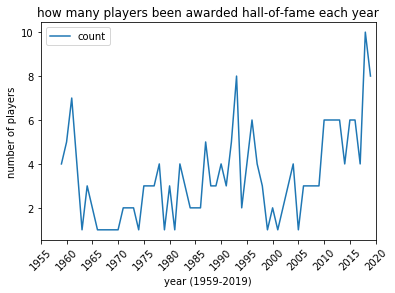

In [18]:
awardedGroupByYear.plot('year', 'count')
plt.xticks(np.arange(1955, 2025, step=5), rotation=45)
plt.xlabel("year (1959-2019)")
plt.ylabel("number of players")
plt.title("how many players been awarded hall-of-fame each year")
plt.show()

### Add 'class' column (0, 1) based on players status in hall-of-fame

In [19]:
data_candidates['class'] = np.full(data_candidates.shape[0], 0)
data_candidates.head()

,year,name,games,points,total_rebounds,assists,steals,blocks,field_goal,3_point_field_goal,free_throw,win_shares,win_shares_per_48_mins,class
1,1962,Larry Foust,817.0,13.7,9.8,1.7,0.939614,0.544928,0.405,0.263418,0.741,74.3,0.163,0
2,1966,Red Kerr,905.0,13.8,11.2,2.2,0.939614,0.544928,0.418,0.263418,0.723,61.8,0.107,0
3,1968,Larry Costello,706.0,12.2,3.8,4.6,0.939614,0.544928,0.438,0.263418,0.841,62.7,0.142,0
4,1964,Kenny Sears,529.0,13.9,7.8,1.6,0.939614,0.544928,0.455,0.263418,0.826,55.8,0.179,0
5,1969,Rudy LaRusso,736.0,15.6,9.4,2.1,0.939614,0.544928,0.431,0.263418,0.767,61.4,0.120,0


In [20]:
data['class'] = np.full(data.shape[0], 1)
data.head()

,year,name,games,points,total_rebounds,assists,steals,blocks,field_goal,3_point_field_goal,free_throw,win_shares,win_shares_per_48_mins,class
0,1995,Kareem Abdul-Jabbar,1560.0,24.6,11.2,3.6,0.900000,2.60,0.559,0.056000,0.721,273.4,0.228,1
1,2018,Ray Allen,1300.0,18.9,4.1,3.4,1.100000,0.20,0.452,0.400000,0.894,145.1,0.150,1
2,1991,Tiny Archibald,876.0,18.8,2.3,7.4,1.100000,0.10,0.467,0.224000,0.810,83.4,0.128,1
3,1978,Paul Arizin,713.0,22.8,8.6,2.3,1.192222,0.86,0.421,0.236679,0.810,108.8,0.183,1
4,2006,Charles Barkley,1073.0,22.1,11.7,3.9,1.500000,0.80,0.541,0.266000,0.735,177.2,0.216,1


### Merging the dataset to predict next years finalist

In [21]:
data_all = pd.concat([data, data_candidates])
print(data_all.shape)
data_all.head()

(404, 14)


,year,name,games,points,total_rebounds,assists,steals,blocks,field_goal,3_point_field_goal,free_throw,win_shares,win_shares_per_48_mins,class
0,1995,Kareem Abdul-Jabbar,1560.0,24.6,11.2,3.6,0.900000,2.60,0.559,0.056000,0.721,273.4,0.228,1
1,2018,Ray Allen,1300.0,18.9,4.1,3.4,1.100000,0.20,0.452,0.400000,0.894,145.1,0.150,1
2,1991,Tiny Archibald,876.0,18.8,2.3,7.4,1.100000,0.10,0.467,0.224000,0.810,83.4,0.128,1
3,1978,Paul Arizin,713.0,22.8,8.6,2.3,1.192222,0.86,0.421,0.236679,0.810,108.8,0.183,1
4,2006,Charles Barkley,1073.0,22.1,11.7,3.9,1.500000,0.80,0.541,0.266000,0.735,177.2,0.216,1


In [22]:
data_all.isnull().any()

year                      False
name                      False
games                     False
points                    False
total_rebounds            False
assists                   False
steals                    False
blocks                    False
field_goal                False
3_point_field_goal        False
free_throw                False
win_shares                False
win_shares_per_48_mins    False
class                     False
dtype: bool

## 3. Using prediction algorithms from scikit-learn to predict this years candidate

In [23]:
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn import metrics
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [24]:
# extract underlying numpy arrays
X = data_all.iloc[:,2:-1].values   
y = np.ravel(data_all.iloc[:,-1:].values)

print(X.shape)
print(y.shape)

(404, 11)
(404,)


### 3.1 Decision Tree

In [25]:
# instantiate the model (using the default parameters)
tree = DecisionTreeClassifier()

# fit the model with data
tree.fit(X, y)

# predict the response for new observations
pred_tree = tree.predict(cur_candidates.iloc[:,2:].values)
candidate_prediction = cur_candidates.iloc[:,0:2]
candidate_prediction['pred_tree'] = pred_tree
candidate_prediction

,year,name,pred_tree
169,2016,Kevin Garnett,1
178,2016,Kobe Bryant,1
181,2016,Tim Duncan,1
192,2016,Andre Miller,1
198,2016,Elton Brand,0
208,2016,Amar'e Stoudemire,1
209,2016,Tayshaun Prince,0
211,2016,Caron Butler,0
213,2016,Kirk Hinrich,0
214,2016,Chris Bosh,1


### 3.2 Naive Bayes

In [26]:
nb = GaussianNB()

nb.fit(X, y)

pred_nb = nb.predict(cur_candidates.iloc[:,2:].values)

candidate_prediction['pred_nb'] = pred_nb
candidate_prediction

,year,name,pred_tree,pred_nb
169,2016,Kevin Garnett,1,1
178,2016,Kobe Bryant,1,1
181,2016,Tim Duncan,1,1
192,2016,Andre Miller,1,0
198,2016,Elton Brand,0,1
208,2016,Amar'e Stoudemire,1,1
209,2016,Tayshaun Prince,0,0
211,2016,Caron Butler,0,0
213,2016,Kirk Hinrich,0,0
214,2016,Chris Bosh,1,1


### 3.3 Perceptron

In [27]:
percep = Perceptron()

percep.fit(X, y)

pred_precep = percep.predict(cur_candidates.iloc[:,2:].values)

candidate_prediction['pred_percep'] = pred_precep
candidate_prediction

,year,name,pred_tree,pred_nb,pred_percep
169,2016,Kevin Garnett,1,1,1
178,2016,Kobe Bryant,1,1,1
181,2016,Tim Duncan,1,1,1
192,2016,Andre Miller,1,0,0
198,2016,Elton Brand,0,1,1
208,2016,Amar'e Stoudemire,1,1,1
209,2016,Tayshaun Prince,0,0,0
211,2016,Caron Butler,0,0,0
213,2016,Kirk Hinrich,0,0,0
214,2016,Chris Bosh,1,1,1


### 3.4 Logistic Regression

In [28]:
logreg = LogisticRegression()

logreg.fit(X, y)

pred_logreg = logreg.predict(cur_candidates.iloc[:,2:].values)

# predict the probability towards getting to hallof fame for new observations
pred_prob_logreg = logreg.predict_proba(cur_candidates.iloc[:,2:].values)[:,1]


candidate_prediction['pred_logreg'] = pred_logreg
candidate_prediction['pred_logreg_prob'] = pred_prob_logreg
candidate_prediction

,year,name,pred_tree,pred_nb,pred_percep,pred_logreg,pred_logreg_prob
169,2016,Kevin Garnett,1,1,1,1,0.989130
178,2016,Kobe Bryant,1,1,1,1,0.980610
181,2016,Tim Duncan,1,1,1,1,0.999259
192,2016,Andre Miller,1,0,0,0,0.078928
198,2016,Elton Brand,0,1,1,1,0.868742
208,2016,Amar'e Stoudemire,1,1,1,1,0.833576
209,2016,Tayshaun Prince,0,0,0,0,0.017376
211,2016,Caron Butler,0,0,0,0,0.034103
213,2016,Kirk Hinrich,0,0,0,0,0.054405
214,2016,Chris Bosh,1,1,1,1,0.891396


### 3.5 K nearest neighbors

In [29]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X, y)

pred_knn = knn.predict(cur_candidates.iloc[:,2:].values)

candidate_prediction['pred_knn'] = pred_knn
candidate_prediction

,year,name,pred_tree,pred_nb,pred_percep,pred_logreg,pred_logreg_prob,pred_knn
169,2016,Kevin Garnett,1,1,1,1,0.989130,1
178,2016,Kobe Bryant,1,1,1,1,0.980610,1
181,2016,Tim Duncan,1,1,1,1,0.999259,1
192,2016,Andre Miller,1,0,0,0,0.078928,0
198,2016,Elton Brand,0,1,1,1,0.868742,0
208,2016,Amar'e Stoudemire,1,1,1,1,0.833576,1
209,2016,Tayshaun Prince,0,0,0,0,0.017376,0
211,2016,Caron Butler,0,0,0,0,0.034103,0
213,2016,Kirk Hinrich,0,0,0,0,0.054405,0
214,2016,Chris Bosh,1,1,1,1,0.891396,1


### 3.6 Support vector machine

In [30]:
svmachine = svm.SVC(kernel='linear')

svmachine.fit(X, y)

pred_svm = svmachine.predict(cur_candidates.iloc[:,2:].values)

candidate_prediction['pred_svm'] = pred_svm
candidate_prediction

,year,name,pred_tree,pred_nb,pred_percep,pred_logreg,pred_logreg_prob,pred_knn,pred_svm
169,2016,Kevin Garnett,1,1,1,1,0.989130,1,1
178,2016,Kobe Bryant,1,1,1,1,0.980610,1,1
181,2016,Tim Duncan,1,1,1,1,0.999259,1,1
192,2016,Andre Miller,1,0,0,0,0.078928,0,0
198,2016,Elton Brand,0,1,1,1,0.868742,0,1
208,2016,Amar'e Stoudemire,1,1,1,1,0.833576,1,1
209,2016,Tayshaun Prince,0,0,0,0,0.017376,0,0
211,2016,Caron Butler,0,0,0,0,0.034103,0,0
213,2016,Kirk Hinrich,0,0,0,0,0.054405,0,0
214,2016,Chris Bosh,1,1,1,1,0.891396,1,1


## 4. Give a comparison among these classifier(accuracy, auc etc.)

### 4.1 Normal split

In [31]:
rows_list = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

tree.fit(X_train, y_train)
logreg.fit(X_train, y_train)
percep.fit(X_train, y_train)
nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
svmachine.fit(X_train, y_train)

# predict the response on the train dataset
y_pred_tree   = tree.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_percep = percep.predict(X_test)
y_pred_nb     = nb.predict(X_test)
y_pred_knn    = knn.predict(X_test)
y_pred_svm    = svmachine.predict(X_test)

rows_list.append(['Decision Tree', 'normal-split', metrics.accuracy_score(y_test, y_pred_tree)])
rows_list.append(['Logistic Regression', 'normal-split', metrics.accuracy_score(y_test, y_pred_logreg)])
rows_list.append(['Perceptron', 'normal-split', metrics.accuracy_score(y_test, y_pred_percep)])
rows_list.append(['Naive Bayes', 'normal-split', metrics.accuracy_score(y_test, y_pred_nb)])
rows_list.append(['KNN', 'normal-split', metrics.accuracy_score(y_test, y_pred_knn)])
rows_list.append(['SVM', 'normal-split', metrics.accuracy_score(y_test, y_pred_svm)])

print("Decision Tree:", metrics.accuracy_score(y_test, y_pred_tree))
print("Logistic Regression:", metrics.accuracy_score(y_test, y_pred_logreg))
print("Perceptron:", metrics.accuracy_score(y_test, y_pred_percep))
print("Naive Bayes:", metrics.accuracy_score(y_test, y_pred_nb))
print("KNN:", metrics.accuracy_score(y_test, y_pred_knn))
print("SVM:", metrics.accuracy_score(y_test, y_pred_svm))

Decision Tree: 0.8518518518518519
Logistic Regression: 0.8395061728395061
Perceptron: 0.5925925925925926
Naive Bayes: 0.8888888888888888
KNN: 0.7654320987654321
SVM: 0.8271604938271605


- As we can see, perceptron model doesn't perform well in this dataset

### 4.2 Feature engineering

In [32]:
selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.20)

tree.fit(X_train, y_train)
logreg.fit(X_train, y_train)
percep.fit(X_train, y_train)
nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
svmachine.fit(X_train, y_train)

# predict the response on the train dataset
y_pred_tree   = tree.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_percep = percep.predict(X_test)
y_pred_nb     = nb.predict(X_test)
y_pred_knn    = knn.predict(X_test)
y_pred_svm    = svmachine.predict(X_test)

rows_list.append(['Decision Tree', 'feature-eng', metrics.accuracy_score(y_test, y_pred_tree)])
rows_list.append(['Logistic Regression', 'feature-eng', metrics.accuracy_score(y_test, y_pred_logreg)])
rows_list.append(['Perceptron', 'feature-eng', metrics.accuracy_score(y_test, y_pred_percep)])
rows_list.append(['Naive Bayes', 'feature-eng', metrics.accuracy_score(y_test, y_pred_nb)])
rows_list.append(['KNN', 'feature-eng', metrics.accuracy_score(y_test, y_pred_knn)])
rows_list.append(['SVM', 'feature-eng', metrics.accuracy_score(y_test, y_pred_svm)])

print("Decision Tree:", metrics.accuracy_score(y_test, y_pred_tree))
print("Logistic Regression:", metrics.accuracy_score(y_test, y_pred_logreg))
print("Perceptron:", metrics.accuracy_score(y_test, y_pred_percep))
print("Naive Bayes:", metrics.accuracy_score(y_test, y_pred_nb))
print("KNN:", metrics.accuracy_score(y_test, y_pred_knn))
print("SVM:", metrics.accuracy_score(y_test, y_pred_svm))

Decision Tree: 0.8888888888888888
Logistic Regression: 0.8271604938271605
Perceptron: 0.5432098765432098
Naive Bayes: 0.8888888888888888
KNN: 0.8641975308641975
SVM: 0.8395061728395061


### 4.3 Normalization

In [33]:
normalizer = preprocessing.Normalizer().fit(X)
X_norm = normalizer.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.20)

tree.fit(X_train, y_train)
logreg.fit(X_train, y_train)
percep.fit(X_train, y_train)
nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
svmachine.fit(X_train, y_train)

# predict the response on the train dataset
y_pred_tree   = tree.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_percep = percep.predict(X_test)
y_pred_nb     = nb.predict(X_test)
y_pred_knn    = knn.predict(X_test)
y_pred_svm    = svmachine.predict(X_test)

rows_list.append(['Decision Tree', 'normalization', metrics.accuracy_score(y_test, y_pred_tree)])
rows_list.append(['Logistic Regression', 'normalization', metrics.accuracy_score(y_test, y_pred_logreg)])
rows_list.append(['Perceptron', 'normalization', metrics.accuracy_score(y_test, y_pred_percep)])
rows_list.append(['Naive Bayes', 'normalization', metrics.accuracy_score(y_test, y_pred_nb)])
rows_list.append(['KNN', 'normalization', metrics.accuracy_score(y_test, y_pred_knn)])
rows_list.append(['SVM', 'normalization', metrics.accuracy_score(y_test, y_pred_svm)])

print("Decision Tree:", metrics.accuracy_score(y_test, y_pred_tree))
print("Logistic Regression:", metrics.accuracy_score(y_test, y_pred_logreg))
print("Perceptron:", metrics.accuracy_score(y_test, y_pred_percep))
print("Naive Bayes:", metrics.accuracy_score(y_test, y_pred_nb))
print("KNN:", metrics.accuracy_score(y_test, y_pred_knn))
print("SVM:", metrics.accuracy_score(y_test, y_pred_svm))

Decision Tree: 0.7654320987654321
Logistic Regression: 0.8271604938271605
Perceptron: 0.8148148148148148
Naive Bayes: 0.6790123456790124
KNN: 0.7407407407407407
SVM: 0.5185185185185185


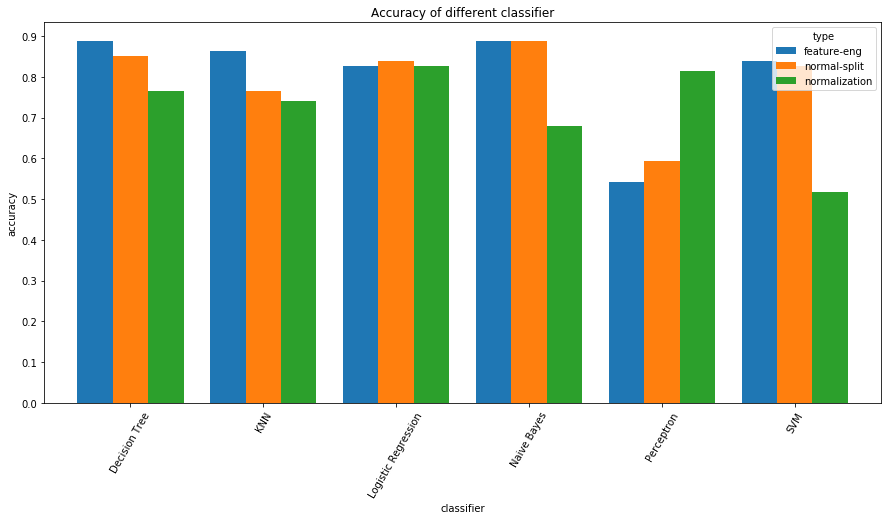

In [34]:
performance = pd.DataFrame(rows_list, columns=['classifier','type','accuracy'])
performance.pivot('classifier','type','accuracy').plot(kind='bar', figsize=(15, 7), width=0.8, rot=60) # stacked=True
plt.title("Accuracy of different classifier")
plt.yticks(np.arange(0, 1, step=0.1))
plt.ylabel('accuracy')
plt.show()

### 4.4 Cross validation

In [35]:
treeCross = cross_validate(tree, X, y, cv=4)
logregCross = cross_validate(logreg, X, y, cv=4)
percepCross = cross_validate(percep, X, y, cv=4)
nbCross = cross_validate(nb, X, y, cv=4)
knnCross = cross_validate(knn, X, y, cv=4)
svmCross = cross_validate(svmachine, X, y, cv=4)

In [36]:
rows_list1 = []

for i in range(4):
    rows_list1.append(['Decision Tree', 'cv'+str(i+1), treeCross['test_score'][i]])
    rows_list1.append(['Logistic Regression', 'cv'+str(i+1), logregCross['test_score'][i]])
    rows_list1.append(['Perceptron', 'cv'+str(i+1), percepCross['test_score'][i]])
    rows_list1.append(['Naive Bayes', 'cv'+str(i+1), nbCross['test_score'][i]])
    rows_list1.append(['KNN', 'cv'+str(i+1), knnCross['test_score'][i]])
    rows_list1.append(['SVM', 'cv'+str(i+1), svmCross['test_score'][i]])
    
rows_list2 = []
for i in range(4):
    rows_list2.append(['Decision Tree', 'cv'+str(i+1), treeCross['fit_time'][i]])
    rows_list2.append(['Logistic Regression', 'cv'+str(i+1), logregCross['fit_time'][i]])
    rows_list2.append(['Perceptron', 'cv'+str(i+1), percepCross['fit_time'][i]])
    rows_list2.append(['Naive Bayes', 'cv'+str(i+1), nbCross['fit_time'][i]])
    rows_list2.append(['KNN', 'cv'+str(i+1), knnCross['fit_time'][i]])
    rows_list2.append(['SVM', 'cv'+str(i+1), svmCross['fit_time'][i]])

    
accuracy_list = dict()
accuracy_list[''] = ['cross-validation-1', 'cross-validation-2', 'cross-validation-3', 'cross-validation-4']
for row in rows_list1:
    if row[0] not in accuracy_list:
        accuracy_list[row[0]] = []
    accuracy_list[row[0]].append(row[2])

print("Accuracy of different classifiers in cross-validation approach with 4 folds")
pd.DataFrame.from_dict(accuracy_list)
# we are using 4 folds here for the cross validation

Accuracy of different classifiers in cross-validation approach with 4 folds


,,Decision Tree,Logistic Regression,Perceptron,Naive Bayes,KNN,SVM
0,cross-validation-1,0.841584,0.821782,0.841584,0.871287,0.841584,0.831683
1,cross-validation-2,0.851485,0.871287,0.811881,0.891089,0.801980,0.861386
2,cross-validation-3,0.881188,0.821782,0.722772,0.821782,0.841584,0.811881
3,cross-validation-4,0.831683,0.801980,0.831683,0.861386,0.792079,0.772277


In [37]:
accuracy_list = dict()
accuracy_list[''] = ['cross-validation-1', 'cross-validation-2', 'cross-validation-3', 'cross-validation-4']
for row in rows_list2:
    if row[0] not in accuracy_list:
        accuracy_list[row[0]] = []
    accuracy_list[row[0]].append(row[2])

print("Running time of different classifiers in cross-validation approach with 4 folds")
pd.DataFrame.from_dict(accuracy_list)

Running time of different classifiers in cross-validation approach with 4 folds


,,Decision Tree,Logistic Regression,Perceptron,Naive Bayes,KNN,SVM
0,cross-validation-1,0.003967,0.002975,0.001488,0.000992,0.000993,11.705591
1,cross-validation-2,0.003677,0.001986,0.000992,0.000992,0.000496,17.373424
2,cross-validation-3,0.003470,0.001977,0.000992,0.000992,0.000992,5.499151
3,cross-validation-4,0.002974,0.001983,0.000992,0.000495,0.001030,11.255224


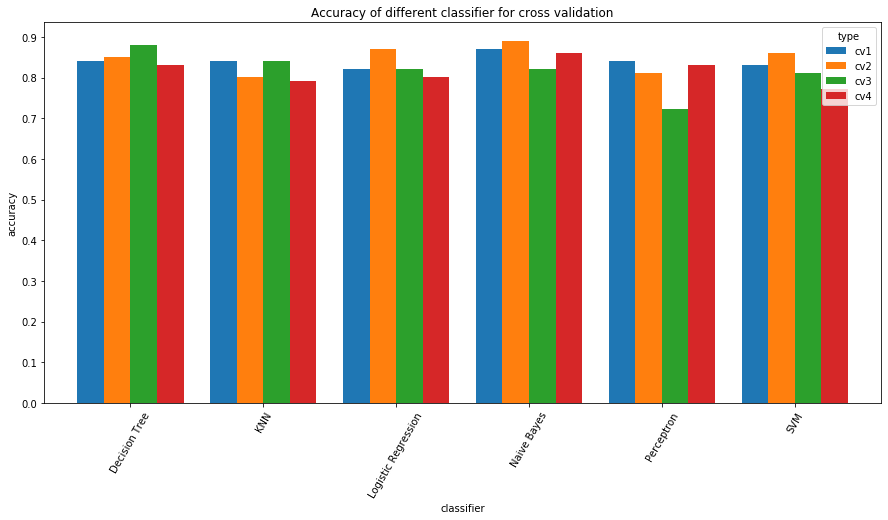

In [38]:
performance = pd.DataFrame(rows_list1, columns=['classifier','type','accuracy'])
performance.pivot('classifier','type','accuracy').plot(kind='bar', figsize=(15, 7), width=0.8, rot=60) # stacked=True
plt.title("Accuracy of different classifier for cross validation")
plt.yticks(np.arange(0, 1, step=0.1))
plt.ylabel('accuracy')
plt.show()

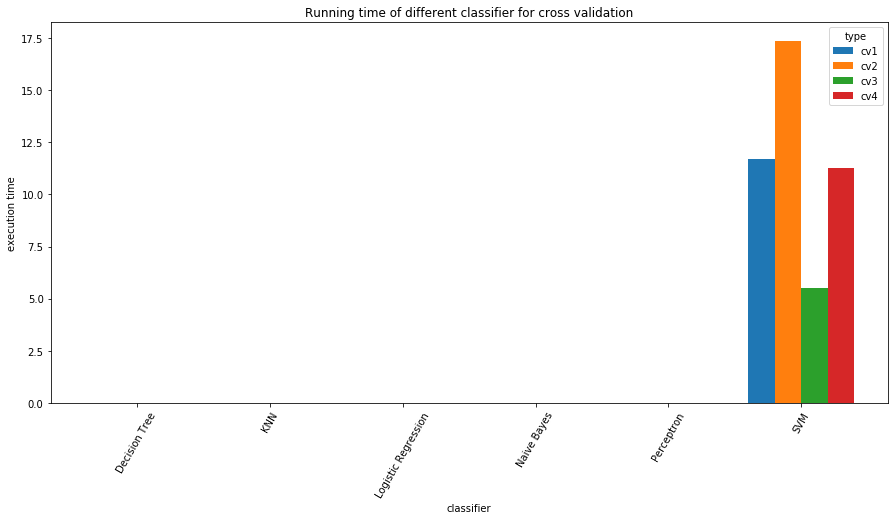

In [39]:
performance = pd.DataFrame(rows_list2, columns=['classifier','type','time'])
performance.pivot('classifier','type','time').plot(kind='bar', figsize=(15, 7), width=0.8, rot=60) # stacked=True
plt.title("Running time of different classifier for cross validation")
plt.ylabel('execution time')
plt.show()

- The execution time of some classifiers are quite small compared to the support-vector-machine, that's why they aren't visible in the chart

## 5. Predict this years candidate using different Ensemble algorithm

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

### 5.1 AdaBoost

In [41]:
# Create adaboost classifer object
aboost = AdaBoostClassifier(n_estimators=50, learning_rate=1)

aboost.fit(X, y)

pred_ab = aboost.predict(cur_candidates.iloc[:,2:].values)

candidate_prediction['pred_ab'] = pred_ab
candidate_prediction

,year,name,pred_tree,pred_nb,pred_percep,pred_logreg,pred_logreg_prob,pred_knn,pred_svm,pred_ab
169,2016,Kevin Garnett,1,1,1,1,0.989130,1,1,1
178,2016,Kobe Bryant,1,1,1,1,0.980610,1,1,1
181,2016,Tim Duncan,1,1,1,1,0.999259,1,1,1
192,2016,Andre Miller,1,0,0,0,0.078928,0,0,0
198,2016,Elton Brand,0,1,1,1,0.868742,0,1,1
208,2016,Amar'e Stoudemire,1,1,1,1,0.833576,1,1,1
209,2016,Tayshaun Prince,0,0,0,0,0.017376,0,0,0
211,2016,Caron Butler,0,0,0,0,0.034103,0,0,0
213,2016,Kirk Hinrich,0,0,0,0,0.054405,0,0,0
214,2016,Chris Bosh,1,1,1,1,0.891396,1,1,1


### 5.2 Gradient Boost

In [42]:
gboost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0)

gboost.fit(X, y)

pred_gb = gboost.predict(cur_candidates.iloc[:,2:].values)

candidate_prediction['pred_gb'] = pred_gb
candidate_prediction

,year,name,pred_tree,pred_nb,pred_percep,pred_logreg,pred_logreg_prob,pred_knn,pred_svm,pred_ab,pred_gb
169,2016,Kevin Garnett,1,1,1,1,0.989130,1,1,1,1
178,2016,Kobe Bryant,1,1,1,1,0.980610,1,1,1,1
181,2016,Tim Duncan,1,1,1,1,0.999259,1,1,1,1
192,2016,Andre Miller,1,0,0,0,0.078928,0,0,0,1
198,2016,Elton Brand,0,1,1,1,0.868742,0,1,1,0
208,2016,Amar'e Stoudemire,1,1,1,1,0.833576,1,1,1,1
209,2016,Tayshaun Prince,0,0,0,0,0.017376,0,0,0,0
211,2016,Caron Butler,0,0,0,0,0.034103,0,0,0,0
213,2016,Kirk Hinrich,0,0,0,0,0.054405,0,0,0,0
214,2016,Chris Bosh,1,1,1,1,0.891396,1,1,1,1


### 5.3 XGBoost

In [43]:
xgboost = xgb.XGBClassifier(random_state=1, learning_rate=0.01)

xgboost.fit(X, y)

pred_xgb = xgboost.predict(cur_candidates.iloc[:,2:].values)

candidate_prediction['pred_xgb'] = pred_xgb
candidate_prediction

,year,name,pred_tree,pred_nb,pred_percep,pred_logreg,pred_logreg_prob,pred_knn,pred_svm,pred_ab,pred_gb,pred_xgb
169,2016,Kevin Garnett,1,1,1,1,0.989130,1,1,1,1,1
178,2016,Kobe Bryant,1,1,1,1,0.980610,1,1,1,1,1
181,2016,Tim Duncan,1,1,1,1,0.999259,1,1,1,1,1
192,2016,Andre Miller,1,0,0,0,0.078928,0,0,0,1,0
198,2016,Elton Brand,0,1,1,1,0.868742,0,1,1,0,1
208,2016,Amar'e Stoudemire,1,1,1,1,0.833576,1,1,1,1,1
209,2016,Tayshaun Prince,0,0,0,0,0.017376,0,0,0,0,0
211,2016,Caron Butler,0,0,0,0,0.034103,0,0,0,0,0
213,2016,Kirk Hinrich,0,0,0,0,0.054405,0,0,0,0,0
214,2016,Chris Bosh,1,1,1,1,0.891396,1,1,1,1,1


### 5.4 Random forest

In [44]:
rforest = RandomForestClassifier(n_estimators=100)

rforest.fit(X, y)

pred_rforest = gboost.predict(cur_candidates.iloc[:,2:].values)

candidate_prediction['pred_rforest'] = pred_rforest
candidate_prediction

,year,name,pred_tree,pred_nb,pred_percep,pred_logreg,pred_logreg_prob,pred_knn,pred_svm,pred_ab,pred_gb,pred_xgb,pred_rforest
169,2016,Kevin Garnett,1,1,1,1,0.989130,1,1,1,1,1,1
178,2016,Kobe Bryant,1,1,1,1,0.980610,1,1,1,1,1,1
181,2016,Tim Duncan,1,1,1,1,0.999259,1,1,1,1,1,1
192,2016,Andre Miller,1,0,0,0,0.078928,0,0,0,1,0,1
198,2016,Elton Brand,0,1,1,1,0.868742,0,1,1,0,1,0
208,2016,Amar'e Stoudemire,1,1,1,1,0.833576,1,1,1,1,1,1
209,2016,Tayshaun Prince,0,0,0,0,0.017376,0,0,0,0,0,0
211,2016,Caron Butler,0,0,0,0,0.034103,0,0,0,0,0,0
213,2016,Kirk Hinrich,0,0,0,0,0.054405,0,0,0,0,0,0
214,2016,Chris Bosh,1,1,1,1,0.891396,1,1,1,1,1,1


## 6. Give a comparison among these classifier(accuracy, auc etc.)

### 6.1 Normal split

In [45]:
rows_list3 = []
aboost.fit(X_train, y_train)
gboost.fit(X_train, y_train)
xgboost.fit(X_train, y_train)
rforest.fit(X_train, y_train)

y_pred_aboost = aboost.predict(X_test)
y_pred_gb = gboost.predict(X_test)
y_pred_xgb = xgboost.predict(X_test)
y_pred_rforest = rforest.predict(X_test)

rows_list3.append(['AdaBoost', 'normal-split', metrics.accuracy_score(y_test, y_pred_aboost)])
rows_list3.append(['Gradient Boost', 'normal-split', metrics.accuracy_score(y_test, y_pred_gb)])
rows_list3.append(['XGBoost', 'normal-split', metrics.accuracy_score(y_test, y_pred_xgb)])
rows_list3.append(['Random Forest', 'normal-split', metrics.accuracy_score(y_test, y_pred_rforest)])

print("AdaBoost:", metrics.accuracy_score(y_test, y_pred_aboost))
print("GradientBoost:", metrics.accuracy_score(y_test, y_pred_gb))
print("XGBoost:", metrics.accuracy_score(y_test, y_pred_xgb))
print("RandomForest:", metrics.accuracy_score(y_test, y_pred_rforest))

AdaBoost: 0.8271604938271605
GradientBoost: 0.9012345679012346
XGBoost: 0.8765432098765432
RandomForest: 0.8765432098765432


### 6.2 Feature engineering

In [46]:
selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.20)

aboost.fit(X_train, y_train)
gboost.fit(X_train, y_train)
xgboost.fit(X_train, y_train)
rforest.fit(X_train, y_train)

y_pred_aboost = aboost.predict(X_test)
y_pred_gb = gboost.predict(X_test)
y_pred_xgb = xgboost.predict(X_test)
y_pred_rforest = rforest.predict(X_test)

rows_list3.append(['AdaBoost', 'feature-eng', metrics.accuracy_score(y_test, y_pred_aboost)])
rows_list3.append(['Gradient Boost', 'feature-eng', metrics.accuracy_score(y_test, y_pred_gb)])
rows_list3.append(['XGBoost', 'feature-eng', metrics.accuracy_score(y_test, y_pred_xgb)])
rows_list3.append(['Random Forest', 'feature-eng', metrics.accuracy_score(y_test, y_pred_rforest)])

print("AdaBoost:", metrics.accuracy_score(y_test, y_pred_aboost))
print("GradientBoost:", metrics.accuracy_score(y_test, y_pred_gb))
print("XGBoost:", metrics.accuracy_score(y_test, y_pred_xgb))
print("RandomForest:", metrics.accuracy_score(y_test, y_pred_rforest))

AdaBoost: 0.9259259259259259
GradientBoost: 0.9135802469135802
XGBoost: 0.8518518518518519
RandomForest: 0.9012345679012346


### 6.3 Normalization

In [47]:
normalizer = preprocessing.Normalizer().fit(X)
X_norm = normalizer.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.20)

aboost.fit(X_train, y_train)
gboost.fit(X_train, y_train)
xgboost.fit(X_train, y_train)
rforest.fit(X_train, y_train)

y_pred_aboost = aboost.predict(X_test)
y_pred_gb = gboost.predict(X_test)
y_pred_xgb = xgboost.predict(X_test)
y_pred_rforest = rforest.predict(X_test)

rows_list3.append(['AdaBoost', 'normalization', metrics.accuracy_score(y_test, y_pred_aboost)])
rows_list3.append(['Gradient Boost', 'normalization', metrics.accuracy_score(y_test, y_pred_gb)])
rows_list3.append(['XGBoost', 'normalization', metrics.accuracy_score(y_test, y_pred_xgb)])
rows_list3.append(['Random Forest', 'normalization', metrics.accuracy_score(y_test, y_pred_rforest)])

print("AdaBoost:", metrics.accuracy_score(y_test, y_pred_aboost))
print("GradientBoost:", metrics.accuracy_score(y_test, y_pred_gb))
print("XGBoost:", metrics.accuracy_score(y_test, y_pred_xgb))
print("RandomForest:", metrics.accuracy_score(y_test, y_pred_rforest))

AdaBoost: 0.7901234567901234
GradientBoost: 0.8148148148148148
XGBoost: 0.8148148148148148
RandomForest: 0.8148148148148148


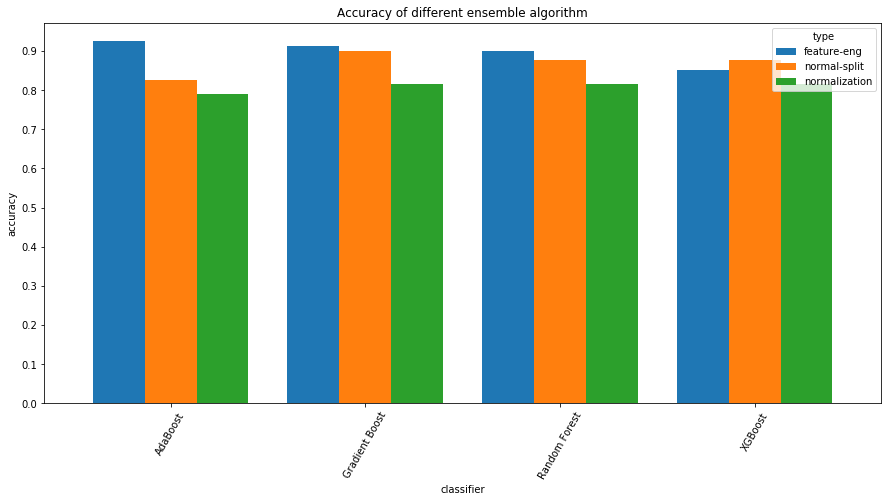

In [48]:
performance = pd.DataFrame(rows_list3, columns=['classifier','type','accuracy'])
performance.pivot('classifier','type','accuracy').plot(kind='bar', figsize=(15, 7), width=0.8, rot=60) # stacked=True
plt.title("Accuracy of different ensemble algorithm")
plt.yticks(np.arange(0, 1, step=0.1))
plt.ylabel('accuracy')
plt.show()

### 6.4 Cross validation

In [49]:
adaCross = cross_validate(aboost, X, y, cv=4)
gradCross = cross_validate(gboost, X, y, cv=4)
xgCross = cross_validate(xgboost, X, y, cv=4)
rfCross = cross_validate(rforest, X, y, cv=4)

In [50]:
rows_list4 = []
for i in range(4):
    rows_list4.append(['AdaBoost', 'cv'+str(i+1), adaCross['test_score'][i]])
    rows_list4.append(['GradientBoost', 'cv'+str(i+1), gradCross['test_score'][i]])
    rows_list4.append(['XGBoost', 'cv'+str(i+1), xgCross['test_score'][i]])
    rows_list4.append(['RandomForest', 'cv'+str(i+1), rfCross['test_score'][i]])

rows_list5 = []
for i in range(4):
    rows_list5.append(['AdaBoost', 'cv'+str(i+1), adaCross['fit_time'][i]])
    rows_list5.append(['GradientBoost', 'cv'+str(i+1), gradCross['fit_time'][i]])
    rows_list5.append(['XGBoost', 'cv'+str(i+1), xgCross['fit_time'][i]])
    rows_list5.append(['RandomForest', 'cv'+str(i+1), rfCross['fit_time'][i]])

accuracy_list = dict()
accuracy_list[''] = ['cross-validation-1', 'cross-validation-2', 'cross-validation-3', 'cross-validation-4']
for row in rows_list4:
    if row[0] not in accuracy_list:
        accuracy_list[row[0]] = []
    accuracy_list[row[0]].append(row[2])

print("Accuracy of different classifiers in cross-validation approach with 4 folds")
pd.DataFrame.from_dict(accuracy_list)
# we are using 4 folds here for the cross validation

Accuracy of different classifiers in cross-validation approach with 4 folds


,,AdaBoost,GradientBoost,XGBoost,RandomForest
0,cross-validation-1,0.841584,0.910891,0.871287,0.891089
1,cross-validation-2,0.920792,0.900990,0.900990,0.930693
2,cross-validation-3,0.881188,0.871287,0.841584,0.871287
3,cross-validation-4,0.891089,0.900990,0.871287,0.891089


In [51]:
accuracy_list = dict()
accuracy_list[''] = ['cross-validation-1', 'cross-validation-2', 'cross-validation-3', 'cross-validation-4']
for row in rows_list5:
    if row[0] not in accuracy_list:
        accuracy_list[row[0]] = []
    accuracy_list[row[0]].append(row[2])

print("Running time of different classifiers in cross-validation approach with 4 folds")
pd.DataFrame.from_dict(accuracy_list)
# we are using 4 folds here for the cross validation

Running time of different classifiers in cross-validation approach with 4 folds


,,AdaBoost,GradientBoost,XGBoost,RandomForest
0,cross-validation-1,0.094128,0.090273,0.147310,0.343727
1,cross-validation-2,0.149346,0.085807,0.145197,0.254447
2,cross-validation-3,0.149295,0.086801,0.148239,0.288722
3,cross-validation-4,0.149788,0.088786,0.143800,0.284197


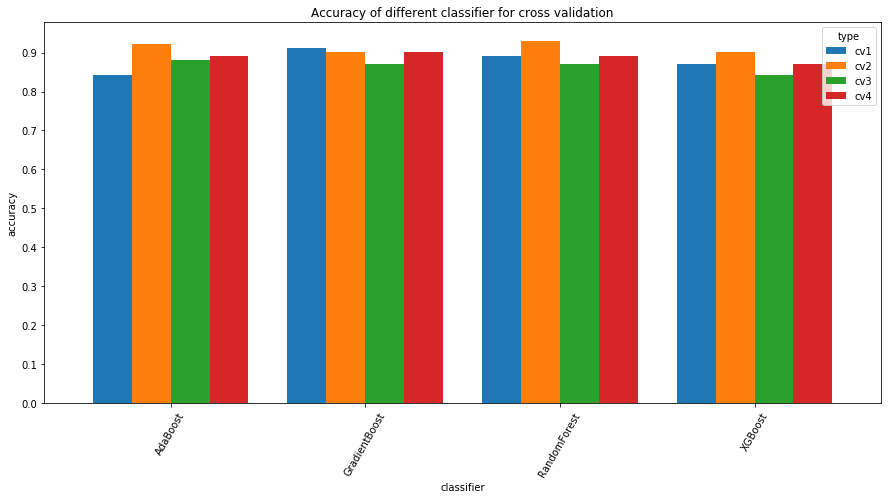

In [52]:
performance = pd.DataFrame(rows_list4, columns=['classifier','type','accuracy'])
performance.pivot('classifier','type','accuracy').plot(kind='bar', figsize=(15, 7), width=0.8, rot=60) # stacked=True
plt.title("Accuracy of different classifier for cross validation")
plt.yticks(np.arange(0, 1, step=0.1))
plt.ylabel('accuracy')
plt.show()

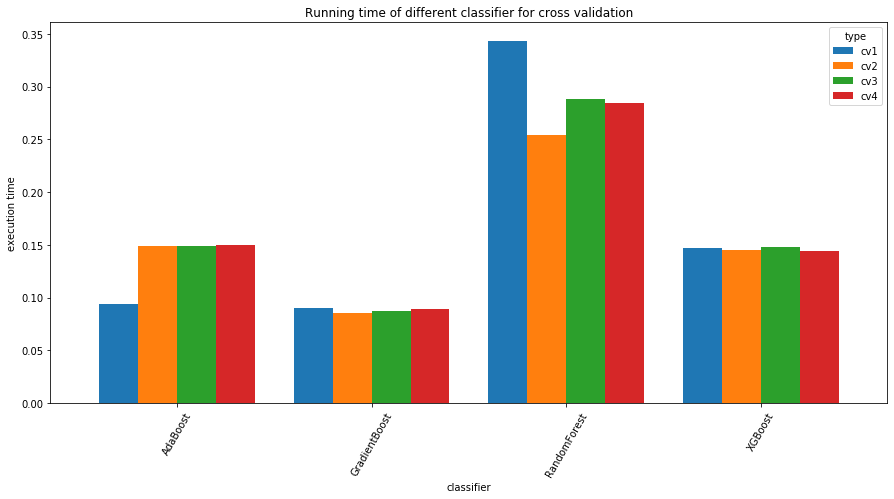

In [53]:
performance = pd.DataFrame(rows_list5, columns=['classifier','type','time'])
performance.pivot('classifier','type','time').plot(kind='bar', figsize=(15, 7), width=0.8, rot=60) # stacked=True
plt.title("Running time of different classifier for cross validation")
plt.ylabel('execution time')
plt.show()

## Working with the active players

### We collected the data for active players from here: https://stats.nba.com/alltime-leaders/?SeasonType=Regular%20Season&PerMode=PerGame&ActiveFlag=Yes

These data aren't formatted and we couldn't find any source that has the stats as csv, xml or other file format.
That's why we manually copied the file into text editor and then formatted the data using tab.
After that we are now able to read the dataset with pandas using tab as separator. We also added the win_share column manually and collected the column data from https://www.basketball-reference.com/players/. After doing all of that we saved the updated file as csv for further use.

In [54]:
active_players = pd.read_csv("data/nba-active-players.csv")
print(active_players.shape)
active_players.head()

(139, 24)


,#,PLAYER,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,OREB,DREB,REB,AST,STL,BLK,TOV,EFG%,TS%,Win Shares
0,1,LeBron James,"1,209",38.6,27.1,9.9,19.6,50.4,1.4,4.2,...,1.2,6.2,7.4,7.3,1.6,0.8,3.5,54.1,58.6,228.9
1,2,Kevin Durant,849,36.9,27.0,9.2,18.7,49.3,1.8,4.9,...,0.7,6.3,7.1,4.1,1.1,1.1,3.1,54.2,61.3,141.7
2,3,James Harden,776,34.2,24.5,7.2,16.3,44.2,2.7,7.4,...,0.8,4.5,5.2,6.2,1.6,0.5,3.7,52.4,60.9,124.3
3,4,Anthony Davis,476,34.6,23.8,8.9,17.3,51.6,0.4,1.3,...,2.6,7.9,10.5,2.1,1.4,2.4,1.9,52.8,58.5,73.9
4,5,Damian Lillard,561,36.3,23.7,7.8,18.0,43.5,2.8,7.5,...,0.6,3.6,4.2,6.3,1.0,0.3,2.8,51.2,57.4,72.9


In [55]:
active_players.isnull().any()

#             False
PLAYER        False
GP            False
MIN           False
PTS           False
FGM           False
FGA           False
FG%           False
3PM           False
3PA           False
3P%           False
FTM           False
FTA           False
FT%           False
OREB          False
DREB          False
REB           False
AST           False
STL           False
BLK           False
TOV           False
EFG%          False
TS%           False
Win Shares     True
dtype: bool

- There are some null values in win_share column, because of the missing data. We will remove these players.

In [56]:
active_players = active_players.dropna()
active_players.shape

(137, 24)

### Let's filter the data and make the same format as previous datasets

In [57]:
active_players.columns

Index(['#', 'PLAYER', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'EFG%', 'TS%', 'Win Shares'],
      dtype='object')

### Rename and reorder the columns

In [58]:
data.columns

Index(['year', 'name', 'games', 'points', 'total_rebounds', 'assists',
       'steals', 'blocks', 'field_goal', '3_point_field_goal', 'free_throw',
       'win_shares', 'win_shares_per_48_mins', 'class'],
      dtype='object')

In [59]:
active_players = active_players.drop(columns=['#', 'MIN', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'OREB', 'DREB',
                                              'TOV', 'EFG%', 'TS%'])
active_players.rename(columns={'PLAYER':'name', 'GP':'games', 'PTS':'points', 'REB':'total_rebounds',
                                'AST':'assists', 'STL':'steals', 'BLK':'blocks', 'FG%':'field_goal',
                                '3P%':'3_point_field_goal', 'FT%':'free_throw', 'Win Shares':'win_shares'}, inplace=True)
cols = ['name','games','points','total_rebounds','assists','steals','blocks','field_goal','3_point_field_goal',
        'free_throw','win_shares']
active_players = active_players[cols]

In [60]:
active_players['games'] = active_players['games'].str.replace(',', '')
active_players['field_goal'] = active_players['field_goal'] / 100
active_players['3_point_field_goal'] = active_players['3_point_field_goal'] / 100
active_players['free_throw'] = active_players['free_throw'] / 100
print(active_players.shape)
active_players.head()

(137, 11)


,name,games,points,total_rebounds,assists,steals,blocks,field_goal,3_point_field_goal,free_throw,win_shares
0,LeBron James,1209,27.1,7.4,7.3,1.6,0.8,0.504,0.343,0.736,228.9
1,Kevin Durant,849,27.0,7.1,4.1,1.1,1.1,0.493,0.381,0.883,141.7
2,James Harden,776,24.5,5.2,6.2,1.6,0.5,0.442,0.364,0.858,124.3
3,Anthony Davis,476,23.8,10.5,2.1,1.4,2.4,0.516,0.313,0.797,73.9
4,Damian Lillard,561,23.7,4.2,6.3,1.0,0.3,0.435,0.369,0.890,72.9


### Use logistic regression to predict the current players being in the hall-of-fame list

- As our active player list doesn't have any win_shares_per_48_mins column, we will remove it from hall-of-fame players and candidate list

In [61]:
data_new = data_all.drop(columns=['win_shares_per_48_mins'])

# extract underlying numpy arrays
X = data_new.iloc[:,2:-1].values   
y = np.ravel(data_new.iloc[:,-1:].values)

In [62]:
logreg = LogisticRegression()

logreg.fit(X, y)

pred_logreg = logreg.predict(active_players.iloc[:,1:].values)

active_prediction = active_players.iloc[:,0:1]
active_prediction['pred_logreg'] = pred_logreg
active_prediction.head()

,name,pred_logreg
0,LeBron James,1
1,Kevin Durant,1
2,James Harden,1
3,Anthony Davis,1
4,Damian Lillard,1


### Confusion matrix

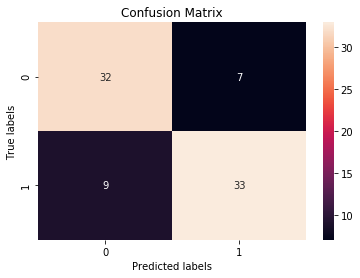

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred_logreg)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

plt.show()

### ROC curve

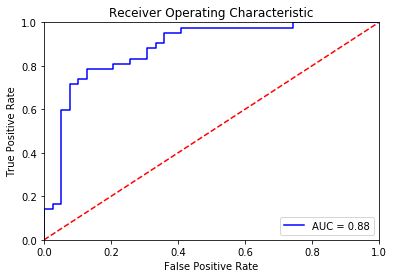

In [64]:
prob_logreg = logreg.predict_proba(X_test)
predictions = prob_logreg[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Show accuracy of different classifier in table

In [65]:
accuracy_list = dict()
accuracy_list[''] = ['normal-split', 'feature-eng', 'normalization']
for row in rows_list:
    if row[0] not in accuracy_list:
        accuracy_list[row[0]] = []
    accuracy_list[row[0]].append(row[2])

print("accuracy of different classifiers")
pd.DataFrame.from_dict(accuracy_list)

accuracy of different classifiers


,,Decision Tree,Logistic Regression,Perceptron,Naive Bayes,KNN,SVM
0,normal-split,0.851852,0.839506,0.592593,0.888889,0.765432,0.827160
1,feature-eng,0.888889,0.827160,0.543210,0.888889,0.864198,0.839506
2,normalization,0.765432,0.827160,0.814815,0.679012,0.740741,0.518519


In [66]:
accuracy_list = dict()
accuracy_list[''] = ['normal-split', 'feature-eng', 'normalization']
for row in rows_list3:
    if row[0] not in accuracy_list:
        accuracy_list[row[0]] = []
    accuracy_list[row[0]].append(row[2])

print("accuracy of different ensemble model")
pd.DataFrame.from_dict(accuracy_list)

accuracy of different ensemble model


,,AdaBoost,Gradient Boost,XGBoost,Random Forest
0,normal-split,0.827160,0.901235,0.876543,0.876543
1,feature-eng,0.925926,0.913580,0.851852,0.901235
2,normalization,0.790123,0.814815,0.814815,0.814815


In [67]:
print("It took %s seconds to process" % (time.time() - start_time))

It took 81.17912149429321 seconds to process
